# テーマ  

- スポーツジムのデータ
- 会員には種類がある
    1. オールタイム会員
    1. デイタイム会員
    1. ナイト会員
- 通常は入会費がかかるが，不定期にキャンペーン施策を行い該当者は入会費が半額や無料になっている場合がある
- 退会は月末までに申告することで来月末に退会できる．

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/var/pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
root_dir = '../sample-source/chap03/'

In [3]:
os.listdir(root_dir)

['customer_master.csv',
 'class_master.csv',
 'use_log.csv',
 '3章_顧客の全体像を把握する１０本ノック.ipynb',
 '3章_顧客の全体像を把握する１０本ノック_answer.ipynb',
 'campaign_master.csv']

利用するデータは４つ

- `use_log.csv`
- `customer_master.csv`
- `class_master.csv`
- `campaign_master.csv`

In [11]:
usr_log = pd.read_csv(root_dir + 'use_log.csv')
cstmr_mst = pd.read_csv(root_dir + 'customer_master.csv')
cls_mst = pd.read_csv(root_dir + 'class_master.csv')
cmpgn_mst = pd.read_csv(root_dir + 'campaign_master.csv')

In [12]:
usr_log.shape

(197428, 3)

In [13]:
usr_log.describe

<bound method NDFrame.describe of                  log_id customer_id     usedate
0       L00000049012330    AS009373  2018-04-01
1       L00000049012331    AS015315  2018-04-01
2       L00000049012332    AS040841  2018-04-01
3       L00000049012333    AS046594  2018-04-01
4       L00000049012334    AS073285  2018-04-01
...                 ...         ...         ...
197423  L00000049209753    TS977703  2019-03-31
197424  L00000049209754    TS979550  2019-03-31
197425  L00000049209755    TS995299  2019-03-31
197426  L00000049209756    TS995853  2019-03-31
197427  L00000049209757    TS999079  2019-03-31

[197428 rows x 3 columns]>

In [14]:
cstmr_mst.shape

(4192, 8)

In [159]:
cstmr_mst.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [161]:
cstmr_mst['end_date'].unique()

array([nan, '2018-04-30 00:00:00', '2018-05-31 00:00:00',
       '2018-06-30 00:00:00', '2018-07-31 00:00:00',
       '2018-08-31 00:00:00', '2018-09-30 00:00:00',
       '2018-11-30 00:00:00', '2018-12-31 00:00:00',
       '2019-01-31 00:00:00', '2018-10-31 00:00:00',
       '2019-02-28 00:00:00', '2019-03-31 00:00:00'], dtype=object)

In [19]:
cls_mst.head()

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [20]:
cmpgn_mst.head()

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


# Q22. 顧客データの整形  
顧客データに会員区分とキャンペーン区分を結合する．

In [25]:
customer = cstmr_mst \
    .merge(cls_mst, on='class', how='left') \
    .merge(cmpgn_mst, on='campaign_id', how='left')

In [26]:
customer.isnull().any()

customer_id      False
name             False
class            False
gender           False
start_date       False
end_date          True
campaign_id      False
is_deleted       False
class_name       False
price            False
campaign_name    False
dtype: bool

# Q23. 顧客データの基礎集計  
会員区分・キャンペーン区分・性別・退会済み，について調べてみる

<BarContainer object of 3 artists>

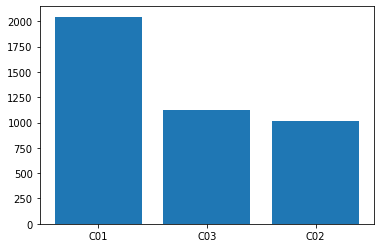

In [44]:
# 会員区分
x = customer['class'].value_counts()
plt.bar(range(len(x)), x, tick_label=x.index)

In [55]:
pd.Series([str(e[0]) + '_' + str(e[1]) for e in zip(customer['class'], customer['class_name'])]).unique()

array(['C01_オールタイム', 'C03_ナイト', 'C02_デイタイム'], dtype=object)

<BarContainer object of 3 artists>

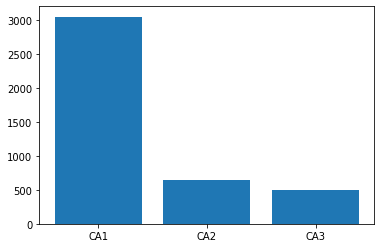

In [57]:
# キャンペーン区分  
x = customer['campaign_id'].value_counts()
plt.bar(range(len(x)), x, tick_label = x.index)

In [58]:
pd.Series([str(e[0]) + '_' + str(e[1]) for e in zip(customer['campaign_id'], customer['campaign_name'])]).unique()

array(['CA1_通常', 'CA2_入会費半額', 'CA3_入会費無料'], dtype=object)

<BarContainer object of 2 artists>

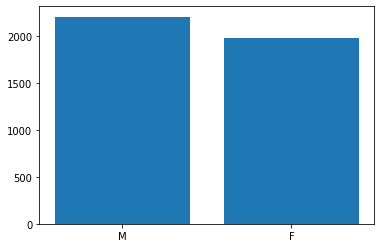

In [60]:
# 性別  
x = customer['gender'].value_counts()
plt.bar(range(len(x)), x, tick_label=x.index)

In [62]:
# 退会済み  
customer.shape[0] - customer['end_date'].isnull().sum()

1350

In [65]:
customer['is_deleted'] = ~customer['end_date'].isnull()

In [66]:
customer['is_deleted'].value_counts()

False    2842
True     1350
Name: is_deleted, dtype: int64

In [75]:
# 月別の入会人数  
customer['start_yymm'] = pd.to_datetime(customer['start_date']).dt.strftime('%Y-%m')

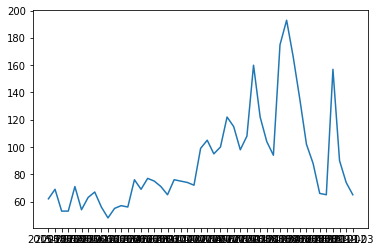

In [78]:
x = customer.groupby('start_yymm').count()['customer_id']
plt.plot(x.index, x)

# Q24. 最新顧客データの基礎集計  
最新月に着目する．

In [154]:
max(customer['start_date'])

'2019-03-15 00:00:00'

In [155]:
customer['end_date'] = pd.to_datetime(customer['end_date'])
customer_newer = customer.loc[(customer['end_date'] >= pd.to_datetime('20190331')) | (customer['end_date'].isna())]

In [156]:
customer_newer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,start_yymm
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-05
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-05
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-05
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-05
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,False,ナイト,6000,通常,2015-05
...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2019-03
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2019-03
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,False,ナイト,6000,通常,2019-03
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2019-03


In [157]:
customer_newer['end_date'].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [158]:
pd.DataFrame({
    'all':customer['class_name'].value_counts(),
    'newer':customer_newer['class_name'].value_counts()
})

,all,newer
オールタイム,2045,1444
ナイト,1128,813
デイタイム,1019,696


In [91]:
pd.DataFrame({
    'all':customer['campaign_name'].value_counts(),
    'newer':customer_newer['campaign_name'].value_counts()
})

,all,newer
通常,3050,2400
入会費半額,650,311
入会費無料,492,242


In [92]:
pd.DataFrame({
    'all':customer['gender'].value_counts(),
    'newer':customer_newer['gender'].value_counts()
})

,all,newer
M,2209,1553
F,1983,1400


# Q25. 利用履歴データの集計  

In [97]:
# 顧客ごとの月利用回数  
usr_log['yymm'] = pd.to_datetime(usr_log['usedate']).dt.strftime('%Y-%m')

In [98]:
usr_log.head()

,log_id,customer_id,usedate,yymm
0,L00000049012330,AS009373,2018-04-01,2018-04
1,L00000049012331,AS015315,2018-04-01,2018-04
2,L00000049012332,AS040841,2018-04-01,2018-04
3,L00000049012333,AS046594,2018-04-01,2018-04
4,L00000049012334,AS073285,2018-04-01,2018-04


In [103]:
usr_log.pivot_table(index='customer_id', columns='yymm', aggfunc='size', fill_value=0)

yymm,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
customer_id,,,,,,,,,,,,
AS002855,4,5,5,5,3,7,3,5,2,6,5,4
AS008805,0,0,8,7,5,2,2,3,5,1,6,1
AS009013,2,0,0,0,0,0,0,0,0,0,0,0
AS009373,3,4,4,7,6,6,5,4,4,7,6,5
AS015233,0,7,7,5,11,9,7,7,9,9,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...
TS995853,0,0,0,0,0,0,0,0,0,0,11,8
TS998593,0,0,0,0,0,9,9,9,7,8,7,8
TS999079,7,5,6,2,3,4,6,6,9,6,2,3


In [147]:
usr_act = usr_log.groupby(['customer_id', 'yymm']).count()['usedate'].reset_index() \
    .groupby('customer_id').agg(['min','median','mean','max', 'size', 'sum'])

In [188]:
usr_act['usedate']

,min,median,mean,max,size,sum
customer_id,,,,,,
AS002855,2,5.0,4.500000,7,12,54
AS008805,1,4.0,4.000000,8,10,40
AS009013,2,2.0,2.000000,2,1,2
AS009373,3,5.0,5.083333,7,12,61
AS015233,4,7.0,7.545455,11,11,83
...,...,...,...,...,...,...
TS995853,8,9.5,9.500000,11,2,19
TS998593,7,8.0,8.142857,9,7,57
TS999079,2,5.5,4.916667,9,12,59


# Q26. 定期利用フラグの作成  
定期的にジムを利用しているユーザーの特定 
定期的な利用の定義をどうするか検討する必要がある．

ここでは，毎週同じ曜日に来ているかどうかで判断する

In [135]:
usr_log['weekday'] = pd.to_datetime(usr_log['usedate']).dt.weekday
usr_log_weekday = usr_log.groupby(['customer_id', 'yymm', 'weekday'], as_index=False).count()[['customer_id', 'yymm', 'weekday', 'log_id']]

In [136]:
usr_log_weekday

,customer_id,yymm,weekday,log_id
0,AS002855,2018-04,5,4
1,AS002855,2018-05,2,1
2,AS002855,2018-05,5,4
3,AS002855,2018-06,5,5
4,AS002855,2018-07,1,1
...,...,...,...,...
93328,TS999855,2019-01,1,1
93329,TS999855,2019-01,5,4
93330,TS999855,2019-01,6,1
93331,TS999855,2019-02,5,4


In [137]:
usr_log_weekday.rename(columns={'log_id':'count'}, inplace=True)
usr_log_weekday

,customer_id,yymm,weekday,count
0,AS002855,2018-04,5,4
1,AS002855,2018-05,2,1
2,AS002855,2018-05,5,4
3,AS002855,2018-06,5,5
4,AS002855,2018-07,1,1
...,...,...,...,...
93328,TS999855,2019-01,1,1
93329,TS999855,2019-01,5,4
93330,TS999855,2019-01,6,1
93331,TS999855,2019-02,5,4


顧客ごとの各月の最大値を取得してその最大値が４位上の場合はフラグを立てるようにする

In [139]:
routine_tbl = usr_log_weekday.groupby('customer_id', as_index=False).max()[['customer_id','count']]
routine_tbl['routine_flg'] = 0

In [140]:
routine_tbl['routine_flg'] = routine_tbl['routine_flg'].where(routine_tbl['count']<4,1)
routine_tbl.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


# Q27. 顧客データと利用履歴データの結合  

In [145]:
usr_log.merge(customer, on='customer_id', how='left')

,log_id,customer_id,usedate,yymm,weekday,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,start_yymm
0,L00000049012330,AS009373,2018-04-01,2018-04,6,XX,C01,F,2015-11-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-11
1,L00000049012331,AS015315,2018-04-01,2018-04,6,XXXXX,C01,M,2015-07-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-07
2,L00000049012332,AS040841,2018-04-01,2018-04,6,XXXXX,C01,F,2017-05-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2017-05
3,L00000049012333,AS046594,2018-04-01,2018-04,6,XXX,C01,M,2018-03-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2018-03
4,L00000049012334,AS073285,2018-04-01,2018-04,6,XXXX,C01,M,2016-09-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2016-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,2019-03,6,XX,C01,M,2018-04-15 00:00:00,NaT,CA3,False,オールタイム,10500,入会費無料,2018-04
197424,L00000049209754,TS979550,2019-03-31,2019-03,6,XXXXXX,C03,M,2018-10-08 00:00:00,NaT,CA1,False,ナイト,6000,通常,2018-10
197425,L00000049209755,TS995299,2019-03-31,2019-03,6,XXXXXX,C03,M,2015-09-01 00:00:00,NaT,CA1,False,ナイト,6000,通常,2015-09
197426,L00000049209756,TS995853,2019-03-31,2019-03,6,XXXX,C01,M,2019-02-08 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2019-02


In [146]:
routine_tbl.merge(customer, on='customer_id', how='left')

,customer_id,count,routine_flg,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,start_yymm
0,AS002855,5,1,XXXX,C03,F,2016-11-01 00:00:00,NaT,CA1,False,ナイト,6000,通常,2016-11
1,AS008805,4,1,XXXXX,C01,M,2018-06-07 00:00:00,2019-03-31,CA2,True,オールタイム,10500,入会費半額,2018-06
2,AS009013,2,0,XXXXX,C03,M,2017-08-01 00:00:00,2018-04-30,CA2,True,ナイト,6000,入会費半額,2017-08
3,AS009373,5,1,XX,C01,F,2015-11-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-11
4,AS015233,5,1,XXXXX,C01,M,2018-05-13 00:00:00,NaT,CA2,False,オールタイム,10500,入会費半額,2018-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,TS995853,5,1,XXXX,C01,M,2019-02-08 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2019-02
4188,TS998593,5,1,XXXXX,C03,M,2018-09-01 00:00:00,NaT,CA1,False,ナイト,6000,通常,2018-09
4189,TS999079,5,1,XXX,C03,M,2016-06-01 00:00:00,NaT,CA1,False,ナイト,6000,通常,2016-06
4190,TS999231,5,1,XXXX,C01,M,2017-03-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2017-03


In [189]:
customer_joined = customer \
    .merge(usr_act['usedate'], on='customer_id', how='left') \
    .merge(routine_tbl, on='customer_id', how='left')

In [190]:
customer_joined.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,start_yymm,min,median,mean,max,size,sum,count,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-05,2,5.0,4.833333,8,12,58,4,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-05,3,5.0,5.083333,7,12,61,5,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-05,3,5.0,4.583333,6,12,55,5,1
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,False,オールタイム,10500,通常,2015-05,2,4.5,4.833333,7,12,58,5,1
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,False,ナイト,6000,通常,2015-05,1,4.0,3.916667,6,12,47,5,1


# Q28. 会計期間の計算  
退会していない人は2019年4月退会とみなして計算する

In [191]:
from dateutil.relativedelta import relativedelta

In [193]:
customer_joined['calc_date'] = pd.to_datetime(customer_joined['end_date'])
customer_joined['calc_date'] = customer_joined['calc_date'].fillna(pd.to_datetime('20190430'))

In [194]:
customer_joined['start_date'] = pd.to_datetime(customer_joined['start_date'])

In [195]:
customer_joined['membership_period'] = 0
for i in range(len(customer_joined)):
    delta = relativedelta(customer_joined['calc_date'].iloc[i], customer_joined['start_date'].iloc[i])
    customer_joined['membership_period'].iloc[i] = delta.years*12 + delta.months

customer_joined['membership_period']

/usr/local/var/pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0       47
1       47
2       47
3       47
4       47
        ..
4187     1
4188     1
4189     1
4190     1
4191     1
Name: membership_period, Length: 4192, dtype: int64

# Q29. 顧客行動の各種統計量の把握  

In [198]:
customer_joined[['mean','median','max','min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [199]:
customer_joined.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

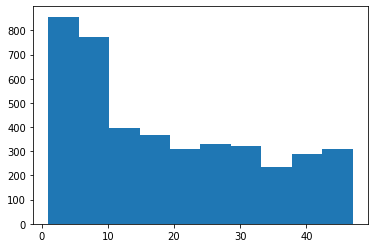

In [201]:
%matplotlib inline

plt.hist(customer_joined['membership_period'])

# Q30. 退会ユーザーと継続ユーザーの違いの把握

In [202]:
customer_joined.loc[customer_joined['is_deleted']==1].describe()

,price,min,median,mean,max,size,sum,count,routine_flg,membership_period
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,8595.555556,1.821481,3.621852,3.865474,6.461481,5.382222,21.832593,3.215556,0.456296,8.026667
std,1949.163652,0.976361,1.270847,1.246385,2.584021,3.126298,14.568978,1.217087,0.498271,5.033692
min,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,6000.000000,1.000000,3.000000,3.000000,4.000000,3.000000,10.000000,2.000000,0.000000,4.000000
50%,7500.000000,2.000000,4.000000,4.000000,7.000000,5.000000,19.000000,3.000000,0.000000,7.000000
75%,10500.000000,2.000000,4.500000,4.666667,8.000000,8.000000,34.000000,4.000000,1.000000,11.000000
max,10500.000000,8.000000,9.000000,9.000000,13.000000,12.000000,66.000000,5.000000,1.000000,23.000000


In [203]:
customer_joined.loc[customer_joined['is_deleted']!=1].describe()

,price,min,median,mean,max,size,sum,count,routine_flg,membership_period
count,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,8542.927516,3.620690,6.024279,6.030288,8.471147,10.406756,59.097115,4.865588,0.984166,23.970443
std,1977.189779,2.030488,1.599765,1.553587,1.571048,3.201867,17.806651,0.406154,0.124855,13.746761
min,6000.000000,1.000000,3.000000,3.166667,5.000000,1.000000,5.000000,2.000000,0.000000,1.000000
25%,6000.000000,2.000000,5.000000,4.833333,7.000000,12.000000,52.000000,5.000000,1.000000,12.000000
50%,7500.000000,3.000000,5.500000,5.583333,8.000000,12.000000,60.000000,5.000000,1.000000,24.000000
75%,10500.000000,5.000000,7.000000,7.178030,10.000000,12.000000,70.000000,5.000000,1.000000,35.000000
max,10500.000000,12.000000,12.000000,12.000000,14.000000,12.000000,105.000000,5.000000,1.000000,47.000000
